0. Etapa 0: Importando el dataset elegido, correspondiente a la venta de vehiculos en Argentina

In [9]:
import pandas as pd

df = pd.read_csv('ProyectoVentaVehiculos+Milanesio.csv', delimiter=';')
df.head()

,ID_Venta,Fecha_Venta,Provincia,Tipo_Comprador,Tipo_Empresa,Vehiculo_Nuevo,Marca,Tipo_Vehiculo,Kilometraje,Precio_USD,Valor_Dolar,Modelo_Vehiculo,Consumo_Litros_100km,Costo_Mantenimiento_Anual,Color
0,1,18/3/2022,Tucuman,Particular,NaN,SI,Mercedes-Benz,Trafic,0,"76177,50483","131,6969387",2022,"21,83582946","3871,603355",Gris
1,2,21/9/2022,Cordoba,Particular,NaN,No,Toyota,SUV,237740,"59373,04844","129,0038998",2005,"9,974152895","3218,352379",Gris
2,3,10/3/2022,Santa Fe,Particular,NaN,No,Mercedes-Benz,Trafic,108993,"73487,05255","156,5218273",2005,"11,16530746","532,2744038",Gris
3,4,5/8/2023,Tucuman,Particular,NaN,No,Toyota,Auto,209384,"13798,06515","120,8424526",2016,"20,12482988","836,8467469",Gris
4,5,15/12/2023,Misiones,Particular,NaN,No,Ford,Camion,103248,"24093,02155","177,7582825",2016,"7,107215815","4859,986977",Gris


1. Etapa 1:  Desarrollo preliminar - Conociendo el dataset

In [10]:
print("Filas y columnas:", df.shape)

Filas y columnas: (2000, 15)


In [11]:
print("Tipos de datos por columna:")
print(df.dtypes)

Tipos de datos por columna:
ID_Venta                      int64
Fecha_Venta                  object
Provincia                    object
Tipo_Comprador               object
Tipo_Empresa                 object
Vehiculo_Nuevo               object
Marca                        object
Tipo_Vehiculo                object
Kilometraje                   int64
Precio_USD                   object
Valor_Dolar                  object
Modelo_Vehiculo               int64
Consumo_Litros_100km         object
Costo_Mantenimiento_Anual    object
Color                        object
dtype: object


In [12]:
# Convertir columna de fecha
df['Fecha_Venta'] = pd.to_datetime(df['Fecha_Venta'], dayfirst=True, errors='coerce')

# Convertir columnas numéricas con separador decimal como coma a float
columnas_a_convertir = [
    'Precio_USD',
    'Valor_Dolar',
    'Consumo_Litros_100km',
    'Costo_Mantenimiento_Anual'
]

for col in columnas_a_convertir:
    df[col] = df[col].str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verificamos los nuevos tipos de datos
print("Tipos de datos después de la conversión:")
print(df.dtypes)


Tipos de datos después de la conversión:
ID_Venta                              int64
Fecha_Venta                  datetime64[ns]
Provincia                            object
Tipo_Comprador                       object
Tipo_Empresa                         object
Vehiculo_Nuevo                       object
Marca                                object
Tipo_Vehiculo                        object
Kilometraje                           int64
Precio_USD                          float64
Valor_Dolar                         float64
Modelo_Vehiculo                       int64
Consumo_Litros_100km                float64
Costo_Mantenimiento_Anual           float64
Color                                object
dtype: object


In [13]:
print("Registros nulos en el dataset",df.isnull().sum())

Registros nulos en el dataset ID_Venta                        0
Fecha_Venta                     0
Provincia                       0
Tipo_Comprador                  0
Tipo_Empresa                 1405
Vehiculo_Nuevo                  0
Marca                           0
Tipo_Vehiculo                   0
Kilometraje                     0
Precio_USD                      0
Valor_Dolar                     0
Modelo_Vehiculo                 0
Consumo_Litros_100km            0
Costo_Mantenimiento_Anual       0
Color                           0
dtype: int64


In [ ]:
#Obs. Se volvio a correr el codigo luego de completar los registros vacios. Razon por la que se obtiene un dataset sin registros vacios.

In [14]:
#Debido a que en los tipos de compradores que son "Particular" tienen registros vacios en "Tipo_empresa", 
#se procede a completar los valores vacios por "No Aplica".

df['Tipo_Empresa'] = df['Tipo_Empresa'].fillna('No Aplica')
print("Registros nulos en tipos de empresas:",df['Tipo_Empresa'].isnull().sum())

Registros nulos en tipos de empresas: 0


In [15]:
print("Años de venta registrados:", df['Fecha_Venta'].dt.year.dropna().unique())

Años de venta registrados: [2022 2023]


In [16]:
print("Provincias en las que se ha vendido:", df['Provincia'].unique())

Provincias en las que se ha vendido: ['Tucuman' 'Cordoba' 'Santa Fe' 'Misiones' 'Salta' 'Buenos Aires'
 'Mendoza' 'Entre Rios']


In [17]:
print("Marcas que se han vendido:", df['Marca'].unique())

Marcas que se han vendido: ['Mercedes-Benz' 'Toyota' 'Ford' 'Nissan' 'Chevrolet' 'Renault' 'Fiat'
 'Volkswagen']


In [18]:
print("Tipos de vehículo:", df['Tipo_Vehiculo'].unique())

Tipos de vehículo: ['Trafic' 'SUV' 'Auto' 'Camion' 'Camioneta' 'Moto']


In [19]:
min_dolar = df['Valor_Dolar'].min()
prom_dolar = df['Valor_Dolar'].mean()
max_dolar = df['Valor_Dolar'].max()

print(f"Valor Dólar - Mínimo: {min_dolar:.2f}")
print(f"Valor Dólar - Promedio: {prom_dolar:.2f}")
print(f"Valor Dólar - Máximo: {max_dolar:.2f}")

Valor Dólar - Mínimo: 80.49
Valor Dólar - Promedio: 148.90
Valor Dólar - Máximo: 199.96


In [20]:
min_consumo = df['Consumo_Litros_100km'].min()
prom_consumo = df['Consumo_Litros_100km'].mean()
max_consumo = df['Consumo_Litros_100km'].max()

print(f"Consumo (L/100km) - Mínimo: {min_consumo:.2f} ")
print(f"Consumo (L/100km) - Promedio: {prom_consumo:.2f} ")
print(f"Consumo (L/100km) - Máximo: {max_consumo:.2f} ")

Consumo (L/100km) - Mínimo: 5.00 
Consumo (L/100km) - Promedio: 15.05 
Consumo (L/100km) - Máximo: 24.99 


In [21]:
min_mantenimiento = df['Costo_Mantenimiento_Anual'].min()
prom_mantenimiento = df['Costo_Mantenimiento_Anual'].mean()
max_mantenimiento = df['Costo_Mantenimiento_Anual'].max()

print(f"Costo Mantenimiento Anual - Mínimo: {min_mantenimiento:.2f}")
print(f"Costo Mantenimiento Anual - Promedio: {prom_mantenimiento:.2f}")
print(f"Costo Mantenimiento Anual - Máximo: {max_mantenimiento:.2f}")

Costo Mantenimiento Anual - Mínimo: 506.66
Costo Mantenimiento Anual - Promedio: 2779.06
Costo Mantenimiento Anual - Máximo: 4999.90


In [22]:
# Filtrar vehículos usados
vehiculos_usados = df[df['Vehiculo_Nuevo'] == 'No']

min_km = vehiculos_usados['Kilometraje'].min()
prom_km = vehiculos_usados['Kilometraje'].mean()
max_km = vehiculos_usados['Kilometraje'].max()

print(f"Kilometraje mínimo: {min_km}")
print(f"Kilometraje promedio: {prom_km:.2f}")
print(f"Kilometraje máximo: {max_km}")

Kilometraje mínimo: 5045
Kilometraje promedio: 152393.45
Kilometraje máximo: 299863


2. Etapa 2: Desarrollo preliminar - Analizando el dataset.

2.1. Cantidad de vehiculos vendidos por provincia

2.1.1. Desarrollo Cuantitativo

In [23]:
# Cantidad de vehículos vendidos por Provincia
cantidad_vehiculos_provincia = df['Provincia'].value_counts().reset_index()
cantidad_vehiculos_provincia.columns = ['Provincia', 'Cantidad']
print(cantidad_vehiculos_provincia)


      Provincia  Cantidad
0  Buenos Aires       801
1      Santa Fe       568
2       Cordoba       219
3       Mendoza       143
4       Tucuman       100
5    Entre Rios        61
6         Salta        56
7      Misiones        52


2.2.2. Desarrollo Grafico

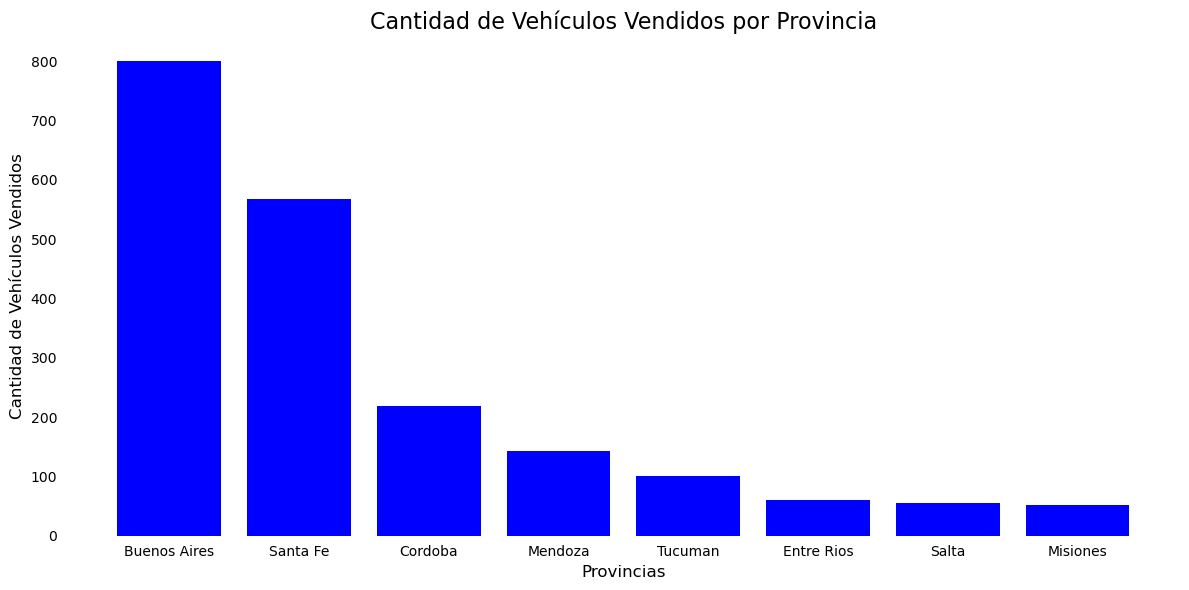

In [24]:
import matplotlib.pyplot as plt

# Ordenar los datos por cantidad de vehículos vendidos
cantidad_vehiculos_provincia = cantidad_vehiculos_provincia.sort_values(by='Cantidad', ascending=False)

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.bar(cantidad_vehiculos_provincia['Provincia'], cantidad_vehiculos_provincia['Cantidad'], color='blue')

# Títulos y etiquetas
plt.title('Cantidad de Vehículos Vendidos por Provincia', fontsize=16, color='black')
plt.xlabel('Provincias', fontsize=12, color='black')
plt.ylabel('Cantidad de Vehículos Vendidos', fontsize=12, color='black')

# Rotar etiquetas del eje X
plt.xticks(rotation=0, fontsize=10, color='black')
plt.yticks(color='black')

# Eliminar borde y ejes
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.gca().tick_params(left=False, bottom=False)  # quitar marcas de los ejes
plt.gca().set_axisbelow(True)  # Para enviar grid detrás de las barras

# Mostrar el gráfico
plt.tight_layout()
plt.show()


3. Etapa 3: Desarrollo de consignas

3.1. Preguntas de interes

3.1.1. ¿Qué provincias concentran más ventas de vehículos nuevos y cuáles de usados?

3.1.2. ¿Qué marcas dominan los ingresos en venta de vehículos ?

3.2. Graficos y análisis

3.2.1. ¿Qué provincias concentran más ventas de vehículos nuevos y cuáles de usados?

3.2.1.1. Desarrollo Grafico

In [25]:
import pandas as pd
import plotly.express as px

# Agrupar por provincia y tipo de vehículo
df_ventas = df.groupby(['Provincia', 'Vehiculo_Nuevo']).size().reset_index(name='Cantidad_Vendida')

# Renombrar los valores de Vehiculo_Nuevo
df_ventas["Vehiculo_Nuevo"] = df_ventas["Vehiculo_Nuevo"].map({"SI": "Nuevo", "No": "Usado"})

# Calcular totales por provincia (como hacías con value_counts())
totales = df_ventas.groupby("Provincia")["Cantidad_Vendida"].sum().sort_values(ascending=False).reset_index()

# Extraer el orden correcto
orden_provincias = totales["Provincia"].tolist()

# Asignar orden categórico a la columna Provincia
df_ventas["Provincia"] = pd.Categorical(df_ventas["Provincia"], categories=orden_provincias, ordered=True)

# Reordenar el DataFrame para asegurar el orden correcto en la visualización
df_ventas = df_ventas.sort_values("Provincia")

# Definir colores
colores = {"Nuevo": "BLUE", "Usado": "RED"}

# Crear gráfico
fig = px.bar(
    df_ventas,
    x="Provincia",
    y="Cantidad_Vendida",
    color="Vehiculo_Nuevo",
    color_discrete_map=colores,
    title="Cantidad de vehículos vendidos por provincia (Nuevos vs Usados)",
    labels={
        "Cantidad_Vendida": "Cantidad de Vehículos Vendidos",
        "Provincia": "Provincia",
        "Vehiculo_Nuevo": "Tipo de Vehículo"
    },
)

# Ajustes estéticos
fig.update_layout(
    title_font_size=20,
    title_font_color='black',
    title_x=0.5,
    xaxis_tickangle=0,
    xaxis_title_font=dict(color='black'),
    yaxis_title_font=dict(color='black'),
    legend_title_font=dict(color='black', size=14),
    legend_font=dict(color='black', size=12),
    font_color='black',
    plot_bgcolor="white",
    barmode="group"
)

# Eliminar líneas de ejes
fig.update_xaxes(showline=False, showgrid=False, zeroline=False)
fig.update_yaxes(showline=False, showgrid=False, zeroline=False)

# Mostrar gráfico
fig.show()


![Gráfico de vehículos](CantidadDeVehiculosVendidosPorProvincia.jpg)

3.2.1.2. Desarrollo cuantitativo

In [26]:
# Top 3 ventas de vehículos USADOS
total_usados = df_ventas[df_ventas["Vehiculo_Nuevo"] == "Usado"]["Cantidad_Vendida"].sum()

top_usados = (
    df_ventas[df_ventas["Vehiculo_Nuevo"] == "Usado"]
    .sort_values("Cantidad_Vendida", ascending=False)
    .head(3)
    .reset_index(drop=True)
)

top_usados.index += 1  # Que arranque desde 1
top_usados["Porcentaje"] = ((top_usados["Cantidad_Vendida"] / total_usados) * 100).round(2).astype(str) + " %"

print("🔴 Top 3 provincias con más ventas de vehículos Usados:")
print(top_usados[["Provincia", "Cantidad_Vendida", "Porcentaje"]])


# Top 3 ventas de vehículos NUEVOS
total_nuevos = df_ventas[df_ventas["Vehiculo_Nuevo"] == "Nuevo"]["Cantidad_Vendida"].sum()

top_nuevos = (
    df_ventas[df_ventas["Vehiculo_Nuevo"] == "Nuevo"]
    .sort_values("Cantidad_Vendida", ascending=False)
    .head(3)
    .reset_index(drop=True)
)

top_nuevos.index += 1  # Que arranque desde 1
top_nuevos["Porcentaje"] = ((top_nuevos["Cantidad_Vendida"] / total_nuevos) * 100).round(2).astype(str) + " %"

print("\n🔵 Top 3 provincias con más ventas de vehículos Nuevos:")
print(top_nuevos[["Provincia", "Cantidad_Vendida", "Porcentaje"]])


🔴 Top 3 provincias con más ventas de vehículos Usados:
      Provincia  Cantidad_Vendida Porcentaje
1  Buenos Aires               585    41.37 %
2      Santa Fe               387    27.37 %
3       Cordoba               166    11.74 %

🔵 Top 3 provincias con más ventas de vehículos Nuevos:
      Provincia  Cantidad_Vendida Porcentaje
1  Buenos Aires               216    36.86 %
2      Santa Fe               181    30.89 %
3       Cordoba                53     9.04 %


3.2.1.3. Desarrollo Conclusion

El análisis de las ventas de vehículos en las distintas provincias muestra que:

Vehículos Usados:

-Buenos Aires lidera ampliamente el mercado de vehículos usados, con 585 unidades vendidas, lo que representa un 41.37% del total nacional de este tipo de vehículo. Le sigue Santa Fe, con 387 unidades, equivalente al 27.37%; y Córdoba ocupa el tercer lugar con 166 unidades, lo que representa un 11.74%.
    
-Esto indica que Buenos Aires concentra por sí sola más del 40% de las ventas de usados, mostrando una fuerte preferencia por el mercado de segunda mano en esa provincia.

Vehículos Nuevos:

-También en el mercado de vehículos nuevos, Buenos Aires encabeza las ventas con 216 unidades, representando un 36.86% del total. En segundo lugar se encuentra Santa Fe con 181 unidades (30.89%); seguida por Córdoba, con 53 unidades (9.04%).
    
-Aunque Buenos Aires sigue liderando, la diferencia con Santa Fe es menos marcada en el caso de vehículos nuevos, lo que sugiere una distribución algo más equilibrada entre ambas provincias para este segmento.

3.2.2. ¿Qué marcas dominan los ingresos en vehículos nuevos vs usados?

3.2.2.1. Desarrollo Grafico

In [27]:
import pandas as pd
import plotly.express as px

# Leer archivo
df = pd.read_csv('ProyectoVentaVehiculos+Milanesio.csv', delimiter=';')

# Asegurar que Fecha_Venta sea datetime
df["Fecha_Venta"] = pd.to_datetime(df["Fecha_Venta"], dayfirst=True)

# Convertir Precio_USD a float (reemplazar coma por punto)
df["Precio_USD"] = df["Precio_USD"].str.replace(",", ".").astype(float)

# Crear columna de trimestre
df["Trimestre"] = df["Fecha_Venta"].dt.to_period("Q").astype(str)

# Agrupar ingresos por Marca y Trimestre
df_ingresos = (
    df.groupby(["Trimestre", "Marca"])["Precio_USD"]
    .sum()
    .reset_index()
    .rename(columns={"Precio_USD": "Ingresos"})
)

# Crear gráfico de líneas
fig = px.line(
    df_ingresos,
    x="Trimestre",
    y="Ingresos",
    color="Marca",
    title="Evolución de ingresos por marca (por trimestre)",
    markers=True
)

# Ajustes visuales
fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    xaxis_title="Trimestre",
    yaxis_title="Ingresos en USD",
    plot_bgcolor="white",
    paper_bgcolor="white",
    font_color="black",
)

fig.show()


![Gráfico de ingresos](EvolucionDeIngresosPorMarca.jpg)

3.2.2.2 Desarrollo Cuantitativo

In [28]:
# Ingresos por marca en millones de USD
ingresos_por_marca = (
    df.groupby("Marca")["Precio_USD"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Convertir a millones y redondear
ingresos_por_marca["Ingresos (M USD)"] = (ingresos_por_marca["Precio_USD"] / 1e6).round(2)

# Eliminar columna original si no la necesitas
ingresos_por_marca = ingresos_por_marca.drop(columns="Precio_USD")

print(" Ranking de marcas por ingresos totales (en millones de USD):")
print(ingresos_por_marca)

# Extraer marca top
marca_top = ingresos_por_marca.iloc[0]["Marca"]
print(f"\n La marca que más ingresos generó fue: {marca_top}")



 Ranking de marcas por ingresos totales (en millones de USD):
           Marca  Ingresos (M USD)
0      Chevrolet             14.17
1         Toyota             14.06
2  Mercedes-Benz             13.85
3     Volkswagen             13.72
4           Ford             13.61
5           Fiat             12.80
6        Renault             12.67
7         Nissan             12.26

 La marca que más ingresos generó fue: Chevrolet


In [29]:
# Filtrar solo datos de la marca top
df_top_marca = df[df["Marca"] == marca_top]

# Agrupar ingresos por tipo de vehículo
ranking_tipo_vehiculo = (
    df_top_marca.groupby("Tipo_Vehiculo")["Precio_USD"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Convertir ingresos a millones y renombrar columna
ranking_tipo_vehiculo["Ingresos (M USD)"] = (ranking_tipo_vehiculo["Precio_USD"] / 1e6).round(2)

# Calcular porcentaje
total_ingresos_marca = ranking_tipo_vehiculo["Precio_USD"].sum()
ranking_tipo_vehiculo["Porcentaje"] = (
    (ranking_tipo_vehiculo["Precio_USD"] / total_ingresos_marca) * 100
).round(2).astype(str) + " %"

# Eliminar columna original
ranking_tipo_vehiculo = ranking_tipo_vehiculo.drop(columns="Precio_USD")

# Mostrar solo top 3
ranking_top3 = ranking_tipo_vehiculo.head(3)

# Mostrar resultado
print(f"\n Top 3 tipos de vehículos dentro de la marca {marca_top}:")
print(ranking_top3)




 Top 3 tipos de vehículos dentro de la marca Chevrolet:
  Tipo_Vehiculo  Ingresos (M USD) Porcentaje
0          Auto              5.49    38.73 %
1     Camioneta              3.80     26.8 %
2        Trafic              2.10    14.82 %


3.2.2.2 Desarrollo Conclusion

Conclusión del análisis de ingresos por marca y tipo de vehículo:

-Chevrolet lidera el mercado en términos de ingresos por ventas de vehículos, con un total de aproximadamente 14.17 millones de USD. Esto la posiciona como la marca que más ingresos generó, seguida muy de cerca por Toyota y Mercedes-Benz.

-Dentro de Chevrolet, el tipo de vehículo que más ingresos aportó fue el Auto, con 5.49 millones de USD, lo que representa casi el 39% de los ingresos totales de la marca.

-Le siguen: Camioneta, con 3.80 millones USD (26.8% del total); y Trafic, con 2.10 millones USD (14.82% del total).

La estrategia comercial de Chevrolet parece estar fuertemente apalancada en la venta de autos particulares, ya que representan el mayor volumen de ingresos. Las camionetas y vehículos utilitarios como el Trafic también son relevantes, pero con menor impacto en comparación.